# Lead Scoring & Prioritization Demo

This notebook demonstrates how to interact with the deployed scoring API at `http://143.198.127.24:5000/api`.

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
API_BASE = "http://143.198.127.24:5000/api"

## 1. Fetch all leads (unfiltered)

In [6]:
resp = requests.get(f"{API_BASE}/leads")
resp.raise_for_status()
data = resp.json()

df = pd.DataFrame(data)
df.head()

,country,email,employee_count,growjo_rank,hiring,id,industry,linkedin,name,phone,priority,revenue_usd,score,state
0,FR,info@zenith-healthcare.com,189,8384.0,False,L0001,SaaS,https://linkedin.com/company/zenith-healthcare,Zenith Healthcare,+33-988-991-7922,Hot,65158534,70,PAC
1,ID,info@golden-systems.com,419,5931.0,False,L0002,Education,https://linkedin.com/company/golden-systems,Golden Systems,+62-871-924-9422,Warm,45687387,62,BT
2,AU,None,1927,NaN,False,L0003,Education,https://linkedin.com/company/summit-foods,Summit Foods,+61-777-212-6667,Cold,422985530,18,NSW
3,CA,info@red-studios.com,146,NaN,False,L0004,Healthcare,https://linkedin.com/company/red-studios,Red Studios,+1-580-414-3991,Warm,20409430,65,BC
4,ID,info@core-dynamics.com,4311,9402.0,True,L0005,Automotive,https://linkedin.com/company/core-dynamics,Core Dynamics,+62-624-348-5724,Cold,956818808,32,BT


## 2. Fetch only Hot leads (min_score=70)

In [7]:
resp = requests.get(f"{API_BASE}/leads", params={"sort": "score_desc", "min_score": 70})
resp.raise_for_status()
hot = pd.DataFrame(resp.json())

hot[["name","industry","country","employee_count","revenue_usd","score","priority"]].head()

,name,industry,country,employee_count,revenue_usd,score,priority
0,Green Motors,SaaS,ID,111,34217556,75,Hot
1,Nova Finance,SaaS,AU,142,22849726,75,Hot
2,Nimbus Media,Agriculture,AU,95,17474652,75,Hot
3,Nimbus Labs,FinTech,AU,57,12942549,75,Hot
4,Bright Foods,SaaS,AU,189,39391024,75,Hot


## 3. Fetch with ICP preferences

In [8]:
import json  # add this import at the top if not already present

prefs = {
    "industries": ["Manufacturing", "Logistics"],
    "countries": ["US", "CA"],
    "rev_min": 1_000_000,
    "rev_max": 50_000_000
}

resp = requests.get(f"{API_BASE}/leads", params={
    "sort": "score_desc",
    "prefs": json.dumps(prefs)
})

resp.raise_for_status()
icp = pd.DataFrame(resp.json())


icp[["name","industry","country","employee_count","revenue_usd","score","priority"]].head()

,name,industry,country,employee_count,revenue_usd,score,priority
0,Red Media,Logistics,SG,30,2759831,90,Hot
1,Green Holdings,Energy,US,45,10627287,85,Hot
2,Golden Studios,Manufacturing,DE,277,49428078,83,Hot
3,Blue Dynamics,Energy,CA,221,30270911,83,Hot
4,Blue Construction,Agriculture,CA,230,52002791,81,Hot


## 4. Visualization: Score distribution

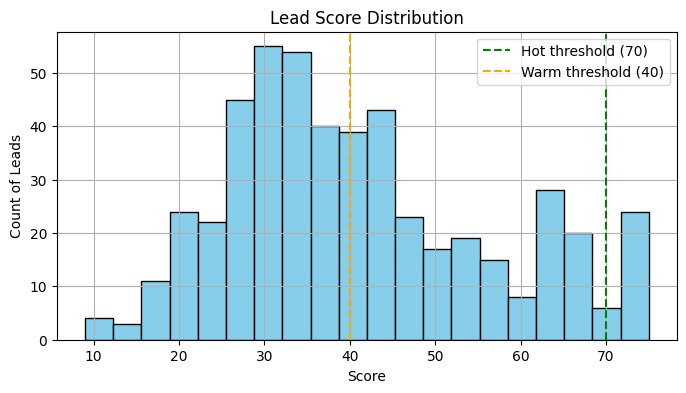

In [9]:
plt.figure(figsize=(8,4))
df["score"].hist(bins=20, color="skyblue", edgecolor="black")
plt.axvline(70, color="green", linestyle="--", label="Hot threshold (70)")
plt.axvline(40, color="orange", linestyle="--", label="Warm threshold (40)")
plt.title("Lead Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count of Leads")
plt.legend()
plt.show()

## 5. Visualization: Top Industries by Avg Score

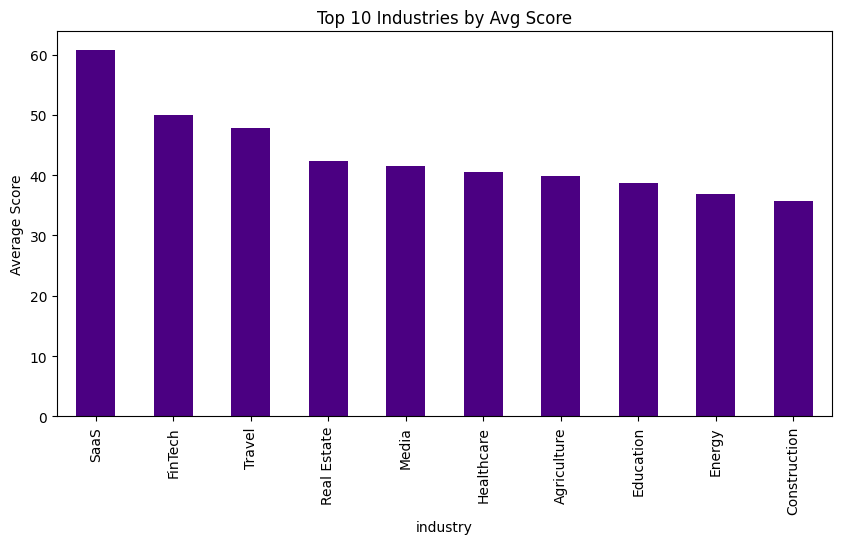

In [10]:
avg_industry = (
    df.groupby("industry")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

avg_industry.plot(kind="bar", figsize=(10,5), color="indigo")
plt.title("Top 10 Industries by Avg Score")
plt.ylabel("Average Score")
plt.show()

## 6. Visualization: Priority Distribution

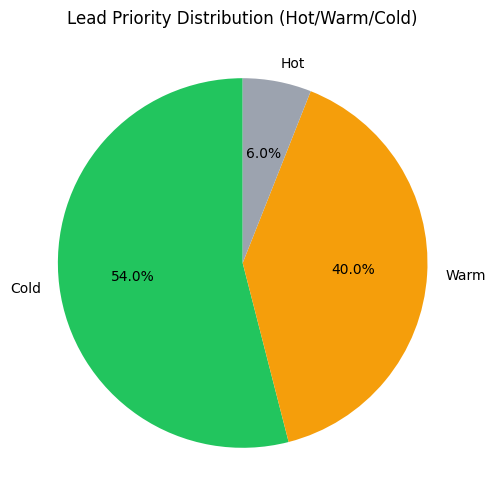

In [11]:
priority_counts = df['priority'].value_counts()
plt.figure(figsize=(6,6))
priority_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#22c55e','#f59e0b','#9ca3af'])
plt.ylabel('')
plt.title('Lead Priority Distribution (Hot/Warm/Cold)')
plt.show()